# Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../data/salary_data.csv')

# Análisis de características

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(4912)

In [7]:
# Eliminacion de nulls y duplicados
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [8]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### Age

In [9]:
data["Age"].describe()

count    1787.000000
mean       35.139899
std         8.213045
min        21.000000
25%        29.000000
50%        33.000000
75%        41.000000
max        62.000000
Name: Age, dtype: float64

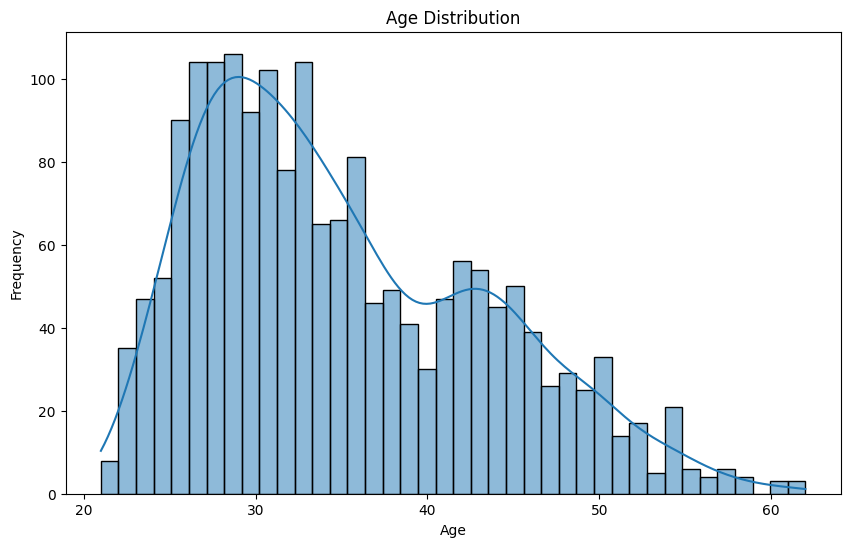

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data["Age"], bins=40, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

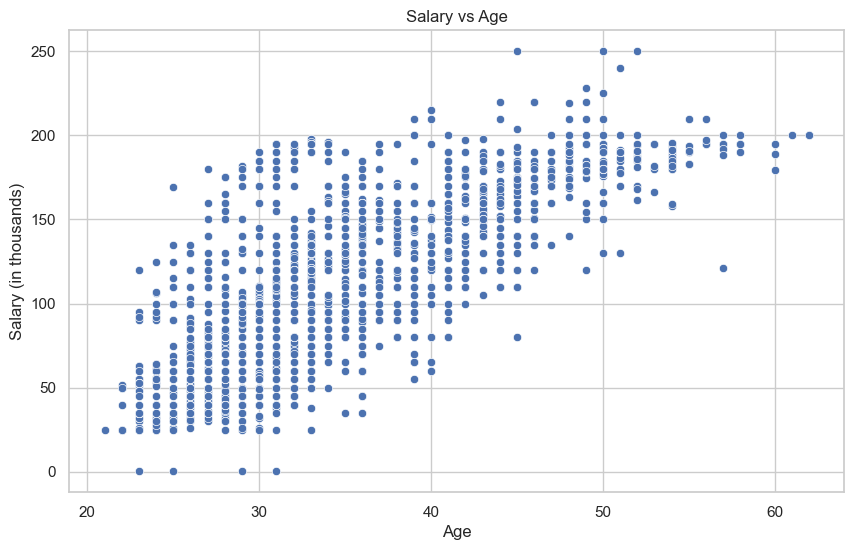

In [11]:
# Hacemos un plot de la relacion que tinen la columna Age con Salary
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Age"], y=data["Salary"] / 1000)
plt.ylabel("Salary (in thousands)")
plt.title("Salary vs Age")
plt.show()

## Gender

- Género

In [12]:
data["Gender"].value_counts()

Gender
Male      966
Female    814
Other       7
Name: count, dtype: int64

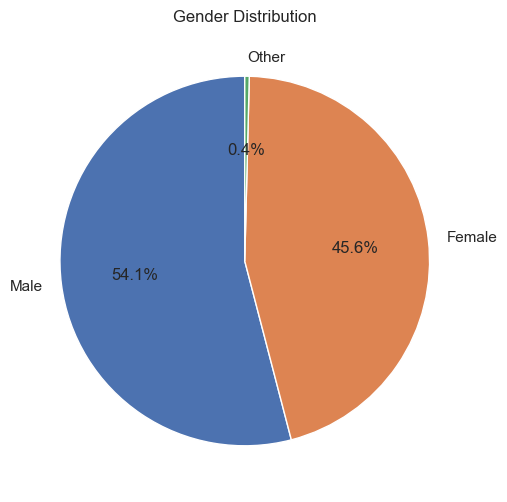

In [13]:
plt.figure(figsize=(10, 6))
plt.pie(data["Gender"].value_counts(), labels=data["Gender"].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.show()

### One Hot Encodig

Realizamos one hot encodig de los tipos

In [14]:
# Hacemos one hot encoding con get dummies
data = pd.get_dummies(data, columns=["Gender"])

In [15]:
data.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Gender_Female,Gender_Male,Gender_Other
0,32.0,Bachelor's,Software Engineer,5.0,90000.0,False,True,False
1,28.0,Master's,Data Analyst,3.0,65000.0,True,False,False
2,45.0,PhD,Senior Manager,15.0,150000.0,False,True,False
3,36.0,Bachelor's,Sales Associate,7.0,60000.0,True,False,False
4,52.0,Master's,Director,20.0,200000.0,False,True,False


## Education Level

- [ ] Quizá haya que unificar categorias ["Bachelor's" y "Bachelor's Degree"] y ["Master's" y "Master's Degree"]

In [16]:
data["Education Level"].value_counts()

Education Level
Bachelor's Degree    506
Master's Degree      446
PhD                  340
Bachelor's           262
Master's             122
High School          110
phD                    1
Name: count, dtype: int64

C:\Users\pablo\AppData\Local\Temp\ipykernel_20564\2473413634.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Education Level", y="Salary", data=data, order=edu_order, palette="pastel")


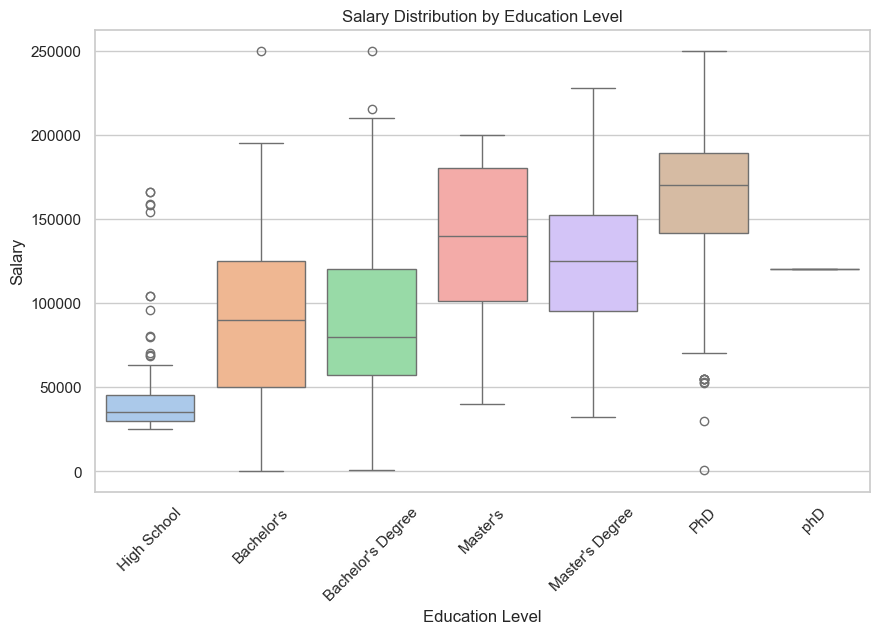

In [17]:
# Definir el orden de los niveles de educación de menor a mayor dificultad
edu_order = ["High School", "Bachelor's", "Bachelor's Degree", "Master's", "Master's Degree", "PhD", "phD"]

# Asegurar que la columna 'Education Level' es categórica y ordenada
data["Education Level"] = pd.Categorical(data["Education Level"], categories=edu_order, ordered=True)

# Crear el gráfico de caja con el nuevo orden
plt.figure(figsize=(10, 6))
sns.boxplot(x="Education Level", y="Salary", data=data, order=edu_order, palette="pastel")
plt.title("Salary Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Salary")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.show()


### One-hot Encodig

In [18]:
data = pd.get_dummies(data, columns=["Education Level"])

In [19]:
data.head()

,Age,Job Title,Years of Experience,Salary,Gender_Female,Gender_Male,Gender_Other,Education Level_High School,Education Level_Bachelor's,Education Level_Bachelor's Degree,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD,Education Level_phD
0,32.0,Software Engineer,5.0,90000.0,False,True,False,False,True,False,False,False,False,False
1,28.0,Data Analyst,3.0,65000.0,True,False,False,False,False,False,True,False,False,False
2,45.0,Senior Manager,15.0,150000.0,False,True,False,False,False,False,False,False,True,False
3,36.0,Sales Associate,7.0,60000.0,True,False,False,False,True,False,False,False,False,False
4,52.0,Director,20.0,200000.0,False,True,False,False,False,False,True,False,False,False


## Job Title

In [20]:
data["Job Title"].value_counts()

Job Title
Software Engineer Manager             127
Full Stack Engineer                   122
Senior Software Engineer               96
Senior Project Engineer                95
Back end Developer                     81
                                     ... 
Junior Research Scientist               1
Senior Product Development Manager      1
Junior Social Media Specialist          1
Social Media Man                        1
Delivery Driver                         1
Name: count, Length: 191, dtype: int64

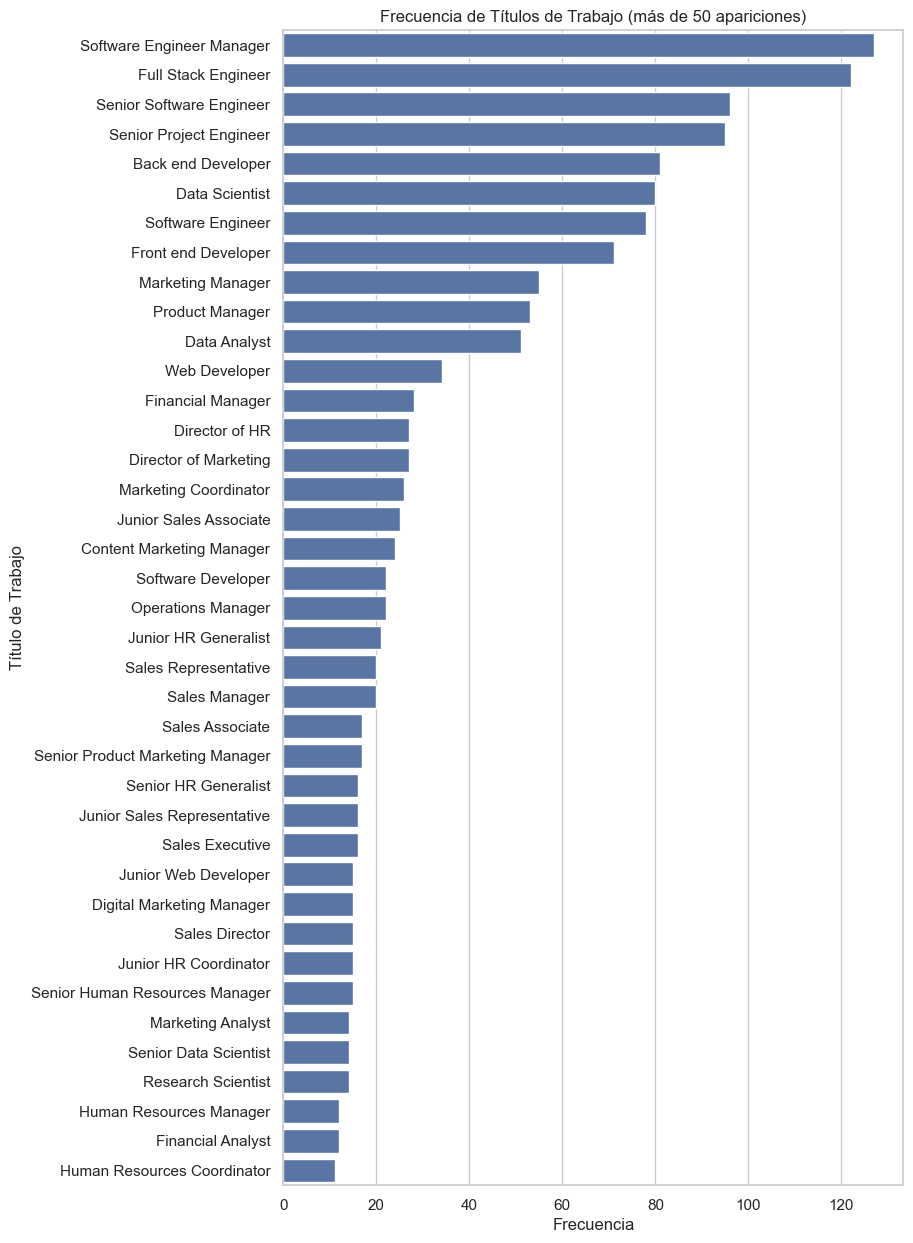

In [21]:
# Filtrar los títulos de trabajo que aparecen más de un cierto umbral (por ejemplo, 50 veces)
job_title_counts = data["Job Title"].value_counts()
filtered_job_titles = job_title_counts[job_title_counts > 10]

# Crear el gráfico de barras
plt.figure(figsize=(8, 15))
sns.barplot(x=filtered_job_titles.values, y=filtered_job_titles.index)
plt.title("Frecuencia de Títulos de Trabajo (más de 50 apariciones)")
plt.xlabel("Frecuencia")
plt.ylabel("Título de Trabajo")
plt.show()

In [22]:
print(list(data["Job Title"].value_counts().index))
print(len(list(data["Job Title"].value_counts().index)))

['Software Engineer Manager', 'Full Stack Engineer', 'Senior Software Engineer', 'Senior Project Engineer', 'Back end Developer', 'Data Scientist', 'Software Engineer', 'Front end Developer', 'Marketing Manager', 'Product Manager', 'Data Analyst', 'Web Developer', 'Financial Manager', 'Director of HR', 'Director of Marketing', 'Marketing Coordinator', 'Junior Sales Associate', 'Content Marketing Manager', 'Software Developer', 'Operations Manager', 'Junior HR Generalist', 'Sales Representative', 'Sales Manager', 'Sales Associate', 'Senior Product Marketing Manager', 'Senior HR Generalist', 'Junior Sales Representative', 'Sales Executive', 'Junior Web Developer', 'Digital Marketing Manager', 'Sales Director', 'Junior HR Coordinator', 'Senior Human Resources Manager', 'Marketing Analyst', 'Senior Data Scientist', 'Research Scientist', 'Human Resources Manager', 'Financial Analyst', 'Human Resources Coordinator', 'Research Director', 'Director of Operations', 'Product Designer', 'Junior S

### Label Encodig

In [23]:
# from sklearn.preprocessing import LabelEncoder

# Aplicar Label Encoding
data['Job Title'] = data['Job Title'].astype('category').cat.codes


In [24]:
data["Job Title"].value_counts()

Job Title
176    127
44     122
168     96
158     95
3       81
      ... 
81       1
154      1
85       1
171      1
21       1
Name: count, Length: 191, dtype: int64

## Years of Experience

In [25]:
data["Years of Experience"].describe()


count    1787.000000
mean        9.156128
std         6.844924
min         0.000000
25%         3.000000
50%         8.000000
75%        13.000000
max        34.000000
Name: Years of Experience, dtype: float64

<Axes: xlabel='Years of Experience', ylabel='Count'>

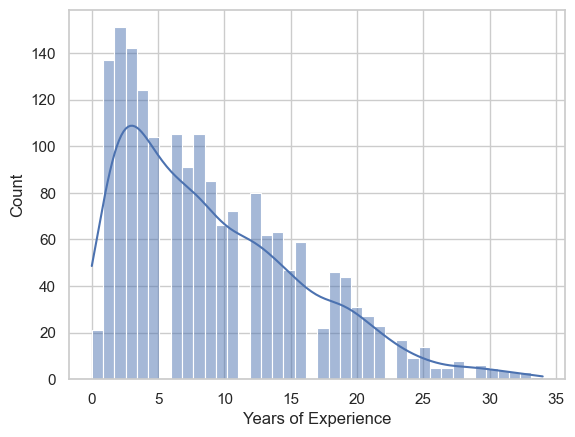

In [26]:
sns.histplot(data["Years of Experience"], bins=40, kde=True)

<Axes: xlabel='Years of Experience', ylabel='Salary'>

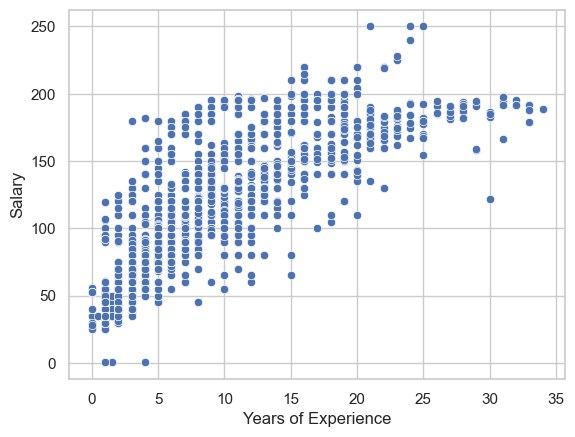

In [27]:
sns.scatterplot(x=data["Years of Experience"], y=data["Salary"] / 1000)

## Salary

In [28]:
data["Salary"].value_counts()

Salary
120000.0    76
40000.0     59
140000.0    56
55000.0     55
180000.0    55
            ..
132720.0     1
161568.0     1
127346.0     1
120177.0     1
148437.0     1
Name: count, Length: 444, dtype: int64

# Save Dataset

In [29]:
# Reemplazar True con 1 y False con 0
data = data.replace({True: 1, False: 0})
data.to_csv('../data/salary_data_clean_pablo.csv', index=False)

C:\Users\pablo\AppData\Local\Temp\ipykernel_20564\819548777.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})
